In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Create a DataFrame with the provided data
data = pd.DataFrame({
    'Object/Attribute': ['CAD', 'CAM', 'HAM', 'NMP'],
    'Credit Risk': ['Low', 'Medium', 'Medium', 'High'],
    'Annual Salary (£K)': [60, 50, 55, 65],
    'Marital status': ['Married', 'Single/Divorced', 'Married', 'Single/Divorced'],
    'House owner': ['Yes', 'No', 'No', 'Yes']
})

In [19]:
# Weights
weights = [0.3, 0.2, 0.3, 0.2]

In [20]:
# Function to calculate weighted Euclidean distance
def weighted_euclidean_distance(x, y, weights):
    squared_diff = [(xi - yi) ** 2 * w for xi, yi, w in zip(x, y, weights)]
    return np.sqrt(sum(squared_diff))

In [21]:
# Apply label encoding to non-ordinal categorical features
label_encoder = LabelEncoder()
categorical_features = ['Marital status', 'House owner']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Ordinal mapping for "Credit Risk"
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Credit Risk'] = data['Credit Risk'].map(ordinal_mapping)

In [22]:
# Standardize the numeric feature
scaler = StandardScaler()
data['Annual Salary (£K)'] = scaler.fit_transform(data[['Annual Salary (£K)']])

# Calculate the dissimilarity matrix using weighted Euclidean distance
dissimilarity_matrix = np.zeros((len(data), len(data)))
for i in range(len(data)):
    for j in range(len(data)):
        x = data.iloc[i, 2:].values  # Exclude 'Object/Attribute' and 'Credit Risk' columns
        y = data.iloc[j, 2:].values  # Exclude 'Object/Attribute' and 'Credit Risk' columns
        dissimilarity_matrix[i][j] = weighted_euclidean_distance(x, y, weights)
dissimilarity_matrix

array([[0.        , 1.2083046 , 0.73484692, 0.66332496],
       [1.2083046 , 0.        , 0.66332496, 1.56843871],
       [0.73484692, 0.66332496, 0.        , 1.2083046 ],
       [0.66332496, 1.56843871, 1.2083046 , 0.        ]])

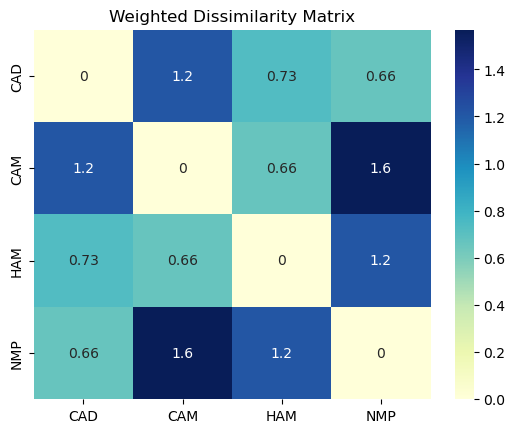

In [23]:
# Create a heatmap for the dissimilarity matrix
sns.heatmap(dissimilarity_matrix, annot=True, cmap="YlGnBu", xticklabels=data['Object/Attribute'], yticklabels=data['Object/Attribute'])
plt.title("Weighted Dissimilarity Matrix")
plt.show()